
Training with sigmoid activation function:


C:\Users\abizh\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6851 - loss: 1.3152 - val_accuracy: 0.9152 - val_loss: 0.3231
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9200 - loss: 0.2915 - val_accuracy: 0.9352 - val_loss: 0.2230
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9409 - loss: 0.2090 - val_accuracy: 0.9492 - val_loss: 0.1779
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9511 - loss: 0.1711 - val_accuracy: 0.9566 - val_loss: 0.1483
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9621 - loss: 0.1338 - val_accuracy: 0.9609 - val_loss: 0.1301
Test loss: 0.13011111319065094
Test accuracy: 0.9609000086784363

Training with tanh activation function:
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8400 - loss: 0.5783 - val_accuracy: 0.9449 - val_loss: 0.1879
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9493 - loss: 0.1744 - val_accuracy: 0.9595 - val_loss: 0.1352
Epoch

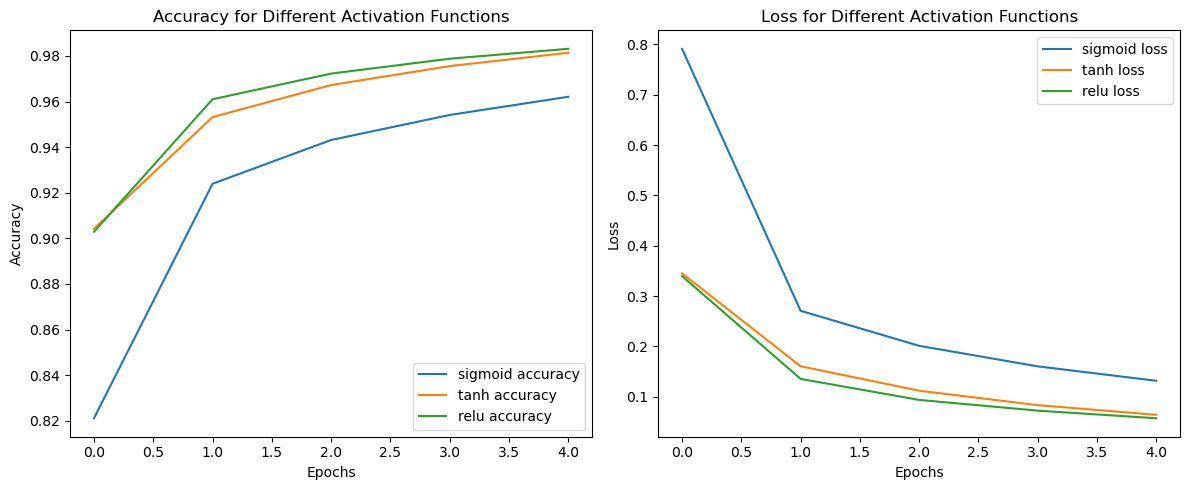

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a function to build the model
def build_model(activation_function):
    model = Sequential()
    model.add(Dense(128, input_shape=(784,)))
    model.add(Activation(activation_function))
    model.add(Dense(64))
    model.add(Activation(activation_function))
    model.add(Dense(10))
   
    if activation_function == 'softmax':
        model.add(Activation(activation_function))
    else:
        model.add(Activation('softmax'))  # Use softmax for final layer for multi-class classification
   
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of activation functions to try
activation_functions = ['sigmoid', 'tanh', 'relu']

# Create dictionaries to store loss and accuracy for each activation function
history_dict = {}

# Train and evaluate models for each activation function
for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
   
    model = build_model(activation)
   
    # Train the model and store the training history
    history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(x_test, y_test))
   
    # Store history for plotting later
    history_dict[activation] = history.history
   
    # Evaluate the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test loss: {score[0]}")
    print(f"Test accuracy: {score[1]}")

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot the accuracy for each activation function
plt.subplot(1, 2, 1)
for activation in activation_functions:
    plt.plot(history_dict[activation]['accuracy'], label=f'{activation} accuracy')
plt.title('Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss for each activation function
plt.subplot(1, 2, 2)
for activation in activation_functions:
    plt.plot(history_dict[activation]['loss'], label=f'{activation} loss')
plt.title('Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
